# Data Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt

init_angle = 79.495 * np.pi / 180
u_init_angle = 0.047 * np.pi / 180

# March 13 number:
# init_angle = 80.298477 * np.pi / 180
# u_init_angle = 0.0653968006 * np.pi / 180

# March 20 number:
# init_angle = 77.313665 * np.pi / 180
# u_init_angle = 0.1026828899 * np.pi / 180


# data.txt contains the following columns:
# voltage, current, current uncertainty, angle, empty, empty, area, area_min, area_max
data = np.loadtxt('data_old.txt', skiprows=1)

voltage = data[:, 0]
current = data[:, 1]
current_uncertainty = data[:, 2]
angle = data[:, 3]
area = data[:, 4]
area_min = data[:, 5]
area_max = data[:, 6]

# import package that computes uncertainties using partial derivatives
import uncertainties as unc
import uncertainties.umath as umath
from uncertainties import unumpy as unp

# voltages are certain has 0 uncertainty
voltage = unp.uarray(voltage, 0)

# currents are uncertain
current = unp.uarray(current, current_uncertainty)

# angle convert to radians
angle = angle * np.pi / 180
# angles use init_angle as reference, and use u_init_angle as uncertainty
angle = unp.uarray(angle, u_init_angle)
# init angle is uncertain
init_angle = unc.ufloat(init_angle, u_init_angle)
# subtract angle from init_angle
angle = init_angle - angle

# compute n = sqrt((2/sqrt(3) * sin(angle) + 0.5)**2 + 3/4)
# only size-1 arrays can be converted to Python scalars
n = unp.sqrt((2/3**0.5 * unp.sin(angle) + 0.5)**2 + 3/4)
A = unc.ufloat(13900, 100)
B = unc.ufloat(1.689, 0.001)
print(n)
wavelength = unp.sqrt(A / (n - B))
print("wavelength:")
print(wavelength)

T0 = unc.ufloat(293, 0.1)
R0 = unc.ufloat(1.1, 0.1)
alpha0 = unc.ufloat(4.5e-3, 0.1e-3)

T = T0 + ((voltage/current)/R0 - 1) / alpha0

print("T:")
print(T)

# compute area
area = unp.uarray(area, (area_max - area_min) / 2)


[1.7008868654899145+/-0.0006348005335746616
 1.7001104056753331+/-0.0006360624560405169
 1.7000132637436356+/-0.0006362200119107655
 1.7016616867318966+/-0.0006335366993960543
 1.701855222122152+/-0.0006332203016540621
 1.7023384947348628+/-0.0006324289776710974
 1.7028211627260437+/-0.0006316368500792982
 1.703303225482496+/-0.0006308439201827902
 1.7041694302379466+/-0.000629414597407377
 1.704265627513804+/-0.0006292555020842223
 1.7046498896341755+/-0.0006286192712288851
 1.7050336684015341+/-0.0006279826868743674
 1.705608795761743+/-0.0006270265412633202]
wavelength:
[1081.3685284742476+/-54.016918641239954
 1118.516620375935+/-59.79165284232323
 1123.4386998961759+/-60.58639405706209
 1047.759525914988+/-49.12450954806588
 1039.8426049028408+/-48.01686792078881
 1020.8313274368509+/-45.42548860886676
 1002.8479937296955+/-43.06190317150467
 985.8036176513303+/-40.899026320310696
 957.2442484788653+/-37.44001668529413
 954.2234156792169+/-37.08603744407175
 942.4357682806761+/-35

# Calculate Fit

In [2]:
def compute_line_fit_m_um_b_ub(xs, ys, xerror, yerror):
    """

    :param xs:
    :param ys:
    :param xerror:
    :param yerror:
    :return: (slope, uncertainty in slope, intercept, uncertainty in intercept)
    """
    N = len(xs)
    b = (np.sum(xs**2) * np.sum(ys) - np.sum(xs) * np.sum(xs * ys)) / (N * np.sum(xs**2) - np.sum(xs)**2)
    m = (N * np.sum(xs * ys) - np.sum(xs) * np.sum(ys)) / (N * np.sum(xs**2) - np.sum(xs)**2)
    delta = np.sum(1/(yerror**2)) * np.sum(xs**2 / yerror**2) - (np.sum(xs / yerror**2))**2
    db = np.sqrt(1 / delta * np.sum(xs**2 / yerror**2))
    dm = np.sqrt(1 / delta * np.sum(1 / yerror**2))
    return m, dm, b, db

def chi_squared(xs, ys, m, b, yerror):
    chi_sq = sum((ys - m * xs - b) ** 2 / yerror ** 2)
    return chi_sq

# PLOT

[2260.698666885659+/-270.6389350615974
 2360.6793120118055+/-314.1324343234279
 2470.0675879939536+/-319.1894918682255
 2578.9292701279155+/-288.8261689294302
 2660.7803677803677+/-292.8687711029068
 2756.11788643077+/-332.9292645853006
 2849.0516758945046+/-338.654690016249
 2918.8069415964146+/-341.0206044110907
 3058.137511902761+/-323.99530871563434
 3072.826234371689+/-349.8140364034946
 3162.9237270665844+/-390.1578251682468
 3264.108758130389+/-365.79489498341775
 3318.690993536653+/-340.9428120358787]
[1081.3685284742476+/-54.016918641239954
 1118.516620375935+/-59.79165284232323
 1123.4386998961759+/-60.58639405706209
 1047.759525914988+/-49.12450954806588
 1039.8426049028408+/-48.01686792078881
 1020.8313274368509+/-45.42548860886676
 1002.8479937296955+/-43.06190317150467
 985.8036176513303+/-40.899026320310696
 957.2442484788653+/-37.44001668529413
 954.2234156792169+/-37.08603744407175
 942.4357682806761+/-35.726206546632646
 931.0884757824336+/-34.449122429678496
 914.825

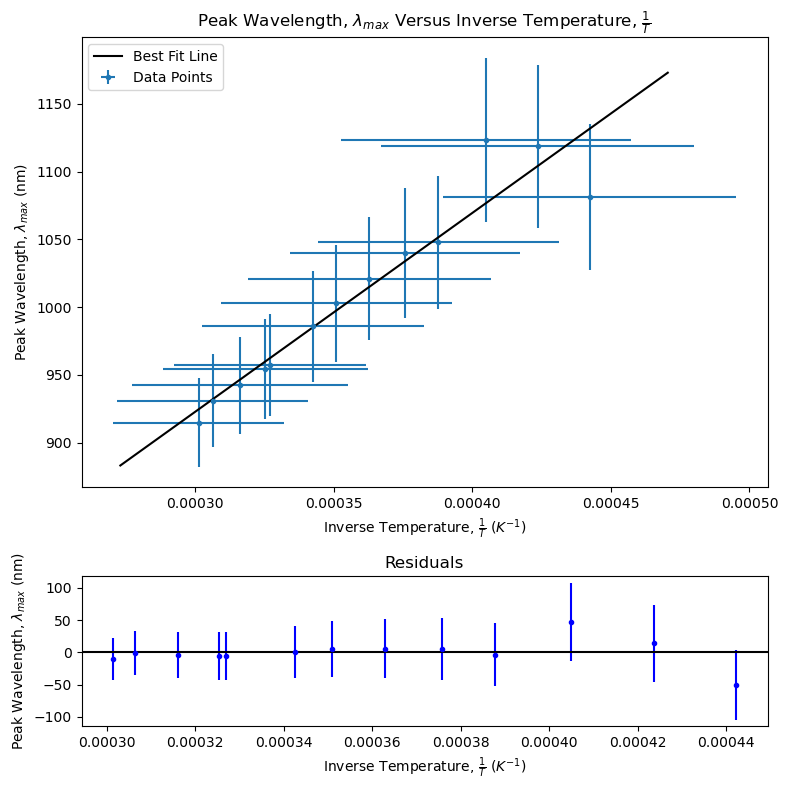

m, dm, b, db
1467573.3493096926 295001.84665881895 482.37915114696693 102.04438636278132
^ that was value in nm
0.00014675733493096926 2.9500184665881896e-05 4.823791511469669e-08 1.0204438636278132e-08
0.002298 is the expected value for m
chi squared
1.7191578526548503
reduced chi squared
0.1562870775140773


In [3]:
# Plot peak wavelength vs 1/T
# plot a line of best fit
# plot error bars
T_value = np.array([t.n for t in T])
T_u = np.array([t.s for t in T])
T_inv = 1/T
T_inv_value = np.array([t.n for t in T_inv])
T_inv_u = np.array([t.s for t in T_inv])
wavelength_n = np.array([w.n for w in wavelength])
wavelength_u = np.array([w.s for w in wavelength])
print(T)
print(wavelength)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [3, 1]})
# ax1.set_aspect('equal')
ax1.errorbar(T_inv_value, wavelength_n, xerr=T_inv_u, yerr=wavelength_u, fmt='.', label='Data Points')
m, dm, b, db = compute_line_fit_m_um_b_ub(T_inv_value, wavelength_n, T_inv_u, wavelength_u)
x = np.linspace(min(T_inv_value) - 0.2 * ( max(T_inv_value) - min(T_inv_value)), max(T_inv_value)+ 0.2 * ( max(T_inv_value) - min(T_inv_value)), 1000)
y = m * x + b
ax1.plot(x, y, label='Best Fit Line', color='black')
ax1.legend(loc='upper left')
ax1.set_xlabel('Inverse Temperature, $\\frac{1}{T}$ ($K^{-1}$)')
ax1.set_ylabel('Peak Wavelength, $\\lambda_{max}$ (nm)')
ax1.set_title('Peak Wavelength, $\\lambda_{max}$ Versus Inverse Temperature, $\\frac{1}{T}$')

ax2.errorbar(T_inv_value, wavelength_n - (m * T_inv_value + b),yerr=wavelength_u, fmt=".",
                color="blue")
ax2.axhline(y=0, color="black")
ax2.set_xlabel('Inverse Temperature, $\\frac{1}{T}$ ($K^{-1}$)')
ax2.set_ylabel('Peak Wavelength, $\\lambda_{max}$ (nm)')
ax2.set_title("Residuals")

fig.tight_layout()
plt.show()



# plt.xlabel('Inverse Temperature, $\\frac{1}{T}$ ($K^{-1}$)')
# plt.ylabel('Peak Wavelength, $\\lambda_{max}$ (nm)')
# plt.title('Peak Wavelength, $\\lambda_{max}$ Versus Inverse Temperature, $\\frac{1}{T}$')
# # best location for legend
# plt.legend(loc='upper left')
# plt.show()
print("m, dm, b, db")
print(m, dm, b, db)
print("^ that was value in nm")
print(m/10e9, dm/10e9, b/10e9, db/10e9)
print(2.298e-3, "is the expected value for m")

print("chi squared")
print(chi_squared(T_inv_value, wavelength_n, m, b, wavelength_u))
print("reduced chi squared")
print(chi_squared(T_inv_value, wavelength_n, m, b, wavelength_u) / (len(T_inv_value) - 2))

[2.3441+/-0.013349999999999973 2.7838+/-0.03049999999999997
 3.2907+/-0.30404999999999993 3.9319+/-0.03664999999999985
 5.2825+/-0.05259999999999998 5.9046+/-0.052449999999999886
 6.9413+/-0.08210000000000006 8.0096+/-0.09145000000000003
 8.9764+/-0.07685000000000031 9.6176+/-0.08699999999999974
 10.6729+/-0.1020500000000002 11.0661+/-0.7803999999999993
 12.9784+/-0.08994999999999997]
[0.851901532920805+/-0.005695149524337687
 1.023816900811163+/-0.010956246856814417
 1.1911003081032612+/-0.09239675448992613
 1.3691227696115633+/-0.00932119331620841
 1.6643994705080747+/-0.009957406530998577
 1.775731708150858+/-0.008882904853842747
 1.9374890768612605+/-0.011827755607739193
 2.0806408222553183+/-0.011417548941270478
 2.1945989110672843+/-0.008561338621273595
 2.2635947533027605+/-0.009045915820994817
 2.367707818451038+/-0.00956159994003506
 2.4038863811240447+/-0.07052168333920707
 2.5632864371140522+/-0.006930746471059603]
[7.723429189130646+/-0.1197147320100073
 7.766704700673298+/

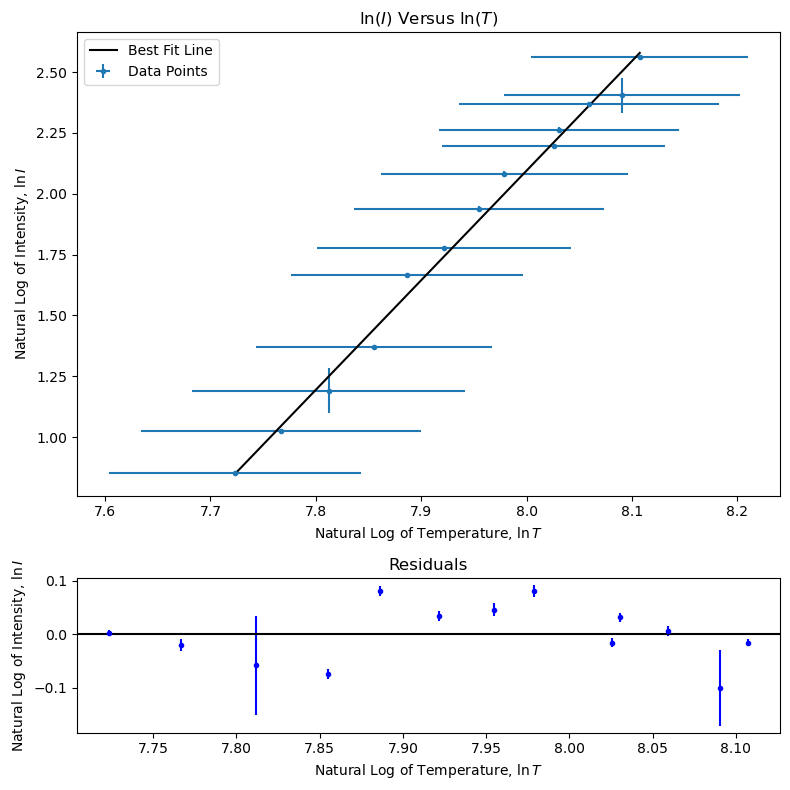

m, dm, b, db
4.504208700902453 0.01913547900730733 -33.93858976949142 0.15164498417210642
chi squared
234.86244597781996
reduced chi squared
21.35113145252909


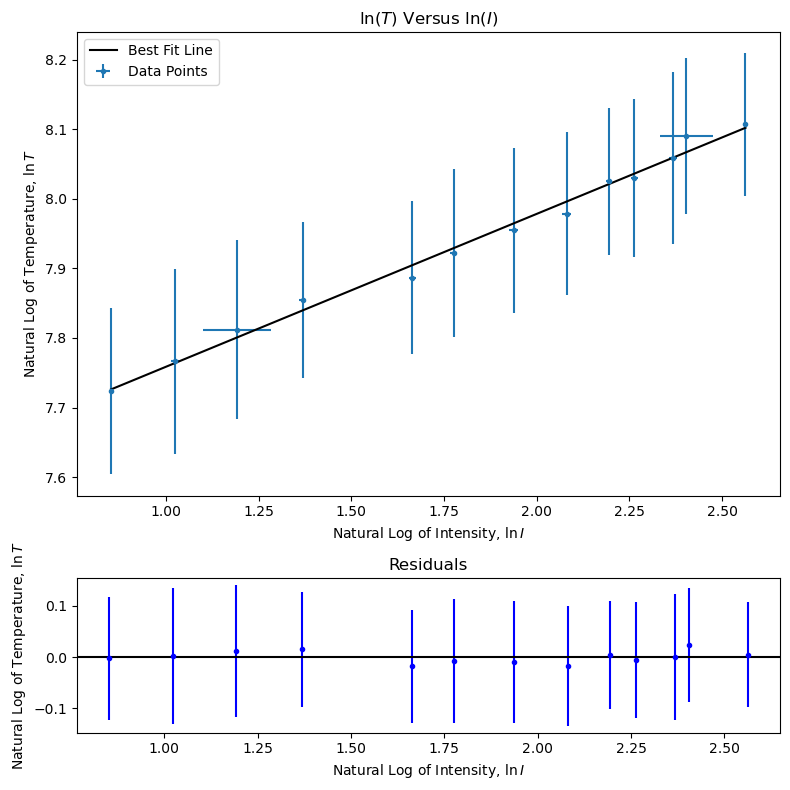

m, dm, b, db
0.21986153831426267 0.06042478725765698 7.538784783367966 0.1173331580006268
chi squared
0.1387696210327746
reduced chi squared
0.0126154200938886


In [4]:
# log log plot of area vs temperature
# plot a line of best fit
# plot error bars
log_area = unp.log(area)
log_area_value = np.array([a.n for a in log_area])
log_area_u = np.array([a.s for a in log_area])
log_T = unp.log(T)
log_T_value = np.array([t.n for t in log_T])
log_T_u = np.array([t.s for t in log_T])
print(area)
print(log_area)
print(log_T)
# plot log(area) vs log(T)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [3, 1]})
# ax1.set_aspect('equal')
ax1.errorbar(log_T_value, log_area_value, xerr=log_T_u, yerr=log_area_u, fmt='.', label='Data Points')
m, dm, b, db = compute_line_fit_m_um_b_ub(log_T_value, log_area_value, log_T_u, log_area_u)
x = np.linspace(min(log_T_value), max(log_T_value), 1000)
y = m * x + b
ax1.plot(x, y, label='Best Fit Line', color='black')
ax1.legend(loc='upper left')
ax1.set_xlabel('Natural Log of Temperature, $\\ln{T}$')
ax1.set_ylabel('Natural Log of Intensity, $\\ln{I}$')
ax1.set_title('$\\ln({I})$ Versus $\\ln({T})$')

ax2.errorbar(log_T_value, log_area_value - (m * log_T_value + b),yerr=log_area_u, fmt=".",
                color="blue")
ax2.axhline(y=0, color="black")
ax2.set_xlabel('Natural Log of Temperature, $\\ln{T}$')
ax2.set_ylabel('Natural Log of Intensity, $\\ln{I}$')
ax2.set_title("Residuals")

fig.tight_layout()
plt.show()


# plt.errorbar(log_T_value, log_area_value, xerr=log_T_u, yerr=log_area_u, fmt='o')
# m, dm, b, db = compute_line_fit_m_um_b_ub(log_T_value, log_area_value, log_T_u, log_area_u)
# x = np.linspace(min(log_T_value), max(log_T_value), 1000)
# y = m * x + b
# plt.plot(x, y, label='y = {:.3f}x + {:.3f}'.format(m, b))
# plt.xlabel('log(T)')
# plt.ylabel('log(Area)')
# plt.title('log(Area) vs log(T)')
# plt.show()
print("m, dm, b, db")
print(m, dm, b, db)
print("chi squared")
print(chi_squared(log_T_value, log_area_value, m, b, log_area_u))
print("reduced chi squared")
print(chi_squared(log_T_value, log_area_value, m, b, log_area_u) / (len(log_T_value) - 2))



# Plot inverse
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [3, 1]})
# ax1.set_aspect('equal')
ax1.errorbar(log_area_value, log_T_value, xerr=log_area_u, yerr=log_T_u, fmt='.', label='Data Points')
m, dm, b, db = compute_line_fit_m_um_b_ub(log_area_value, log_T_value , log_area_u,  log_T_u )
x = np.linspace(min(log_area_value), max(log_area_value), 1000)
y = m * x + b
ax1.plot(x, y, label='Best Fit Line', color='black')
ax1.legend(loc='upper left')
ax1.set_ylabel('Natural Log of Temperature, $\\ln{T}$')
ax1.set_xlabel('Natural Log of Intensity, $\\ln{I}$')
ax1.set_title('$\\ln({T})$ Versus $\\ln({I})$')

ax2.errorbar(log_area_value, log_T_value - (m * log_area_value + b),yerr=log_T_u , fmt=".",
                color="blue")
ax2.axhline(y=0, color="black")
ax2.set_ylabel('Natural Log of Temperature, $\\ln{T}$')
ax2.set_xlabel('Natural Log of Intensity, $\\ln{I}$')
ax2.set_title("Residuals")

fig.tight_layout()
plt.show()


# plt.errorbar(log_area_value, log_T_value, xerr=log_area_u, yerr=log_T_u, fmt='o')
# m, dm, b, db = compute_line_fit_m_um_b_ub(log_area_value, log_T_value, log_area_u, log_T_u)
# x = np.linspace(min(log_area_value), max(log_area_value), 1000)
# y = m * x + b
# plt.plot(x, y, label='y = {:.3f}x + {:.3f}'.format(m, b))
# plt.xlabel('log(Area)')
# plt.ylabel('log(T)')
# plt.title('log(T) vs log(Area)')
# plt.show()
print("m, dm, b, db")
print(m, dm, b, db)

print("chi squared")

print(chi_squared(log_area_value, log_T_value, m, b, log_T_u))
print("reduced chi squared")
print(chi_squared(log_area_value, log_T_value, m, b, log_T_u) / (len(log_area_value) - 2))



In [5]:
unp.log(2.7)

array(0.9932517730102834, dtype=object)

# Plot Curves


[1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504362527329328+/-0.0002162429319518116
 1.8504362527329328+/-0.0002162429319518116
 1.850403183

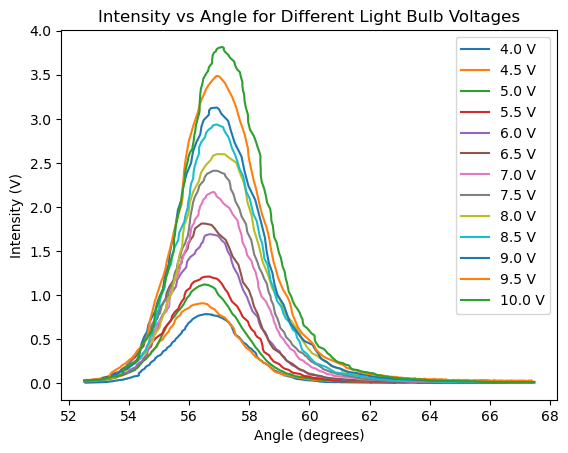

In [6]:
# load data from angle_data folder
# each file name is value.txt, where value is 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0
# contains angle, intensity

# load data from angle_data folder
index = 0
for name in np.arange(4.0, 10.5, 0.5):
    data = np.loadtxt('angle_data_old/{}.txt'.format(name), skiprows=2)
    angle = data[:, 0]
    
    intensity = data[:, 1]
    intensity = intensity - intensity.min()
    angle = angle * np.pi / 180
    angle = unp.uarray(angle, u_init_angle)
    angle = init_angle - angle
    n = unp.sqrt((2/3**0.5 * unp.sin(angle) + 0.5)**2 + 3/4)
    # filter all n <= 1.69
    intensity = intensity[unp.nominal_values(angle/np.pi * 180) > 52.5]
    angle = angle[unp.nominal_values(angle/np.pi * 180) > 52.5]
    intensity = intensity[unp.nominal_values(angle/np.pi * 180) < 67.5]
    angle = angle[unp.nominal_values(angle/np.pi * 180) < 67.5]
    n = n[n > 1.69]
    print(n)
    A = unc.ufloat(13900, 100)
    B = unc.ufloat(1.689, 0.001)
    wavelength = unp.sqrt(A / (n - B))
    wavelength = unp.nominal_values(wavelength)
    # label each plot with the value 
    plt.plot(unp.nominal_values(angle/np.pi * 180), intensity, label='{} V'.format(name))
    index += 1
    # plt.xlim(0.9, 1.1)

# plot vertical line at x=700
# plt.axvline(x=700, color='r', linestyle='--')
plt.xlabel('Angle (degrees)')
plt.ylabel('Intensity (V)')
plt.title('Intensity vs Angle for Different Light Bulb Voltages')
plt.legend()
plt.show()


[1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504362527329328+/-0.0002162429319518116
 1.8504362527329328+/-0.0002162429319518116
 1.850403183

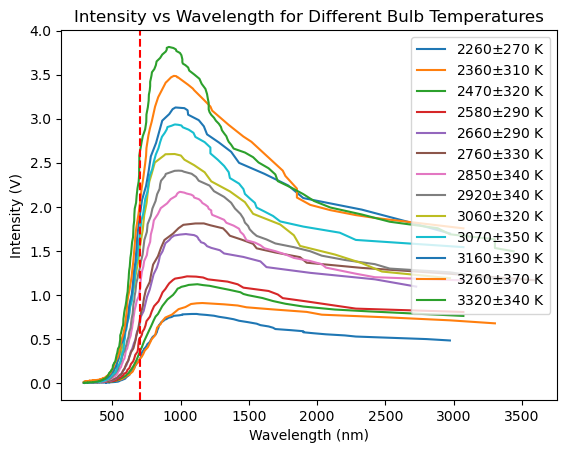

In [7]:
# load data from angle_data folder
# each file name is value.txt, where value is 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0
# contains angle, intensity

# load data from angle_data folder
index = 0
for name in np.arange(4.0, 10.5, 0.5):
    data = np.loadtxt('angle_data_old/{}.txt'.format(name), skiprows=2)
    angle = data[:, 0]
    
    intensity = data[:, 1]
    intensity = intensity - intensity.min()
    angle = angle * np.pi / 180
    angle = unp.uarray(angle, u_init_angle)
    angle = init_angle - angle
    n = unp.sqrt((2/3**0.5 * unp.sin(angle) + 0.5)**2 + 3/4)
    # filter all n <= 1.69
    intensity = intensity[n > 1.69]
    n = n[n > 1.69]
    print(n)
    A = unc.ufloat(13900, 100)
    B = unc.ufloat(1.689, 0.001)
    wavelength = unp.sqrt(A / (n - B))
    wavelength = unp.nominal_values(wavelength)
    # label each plot with the value 
    plt.plot(wavelength, intensity, label='{}$\pm${} K'.format(int(round(T[index].n,-1)), int(round(T[index].s,-1))))
    index += 1
    # plt.xlim(0.9, 1.1)

# plot vertical line at x=700
plt.axvline(x=700, color='r', linestyle='--')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (V)')
plt.title('Intensity vs Wavelength for Different Bulb Temperatures')
plt.legend()
plt.show()


[1.8504692584443923+/-0.00021603782791724543
 1.8504692584443923+/-0.00021603782791724543
 1.8504031831375836+/-0.00021644822810464653
 1.8504031831375836+/-0.00021644822810464653
 1.8504031831375836+/-0.00021644822810464653
 1.8504031831375836+/-0.00021644822810464653
 1.8504031831375836+/-0.00021644822810464653
 1.8504031831375836+/-0.00021644822810464653
 1.8504031831375836+/-0.00021644822810464653
 1.850370114757493+/-0.00021665331223983598
 1.8503370150607947+/-0.0002168583864157983
 1.850137693694995+/-0.0002180890257479781
 1.8499372775719631+/-0.000219319101965316
 1.849261063482879+/-0.00022341685602783238
 1.8487802278818095+/-0.00022628308348663403
 1.8486070304104352+/-0.00022730615632197949
 1.8482232533539202+/-0.00022955595375386204
 1.8481530476501442+/-0.00022996499896152522
 1.8481179152436638+/-0.00023016940498696926
 1.8481179152436638+/-0.00023016940498696926
 1.8480827516241753+/-0.00023037380041775128
 1.8480475567932972+/-0.00023057818524424133
 1.84765824908150

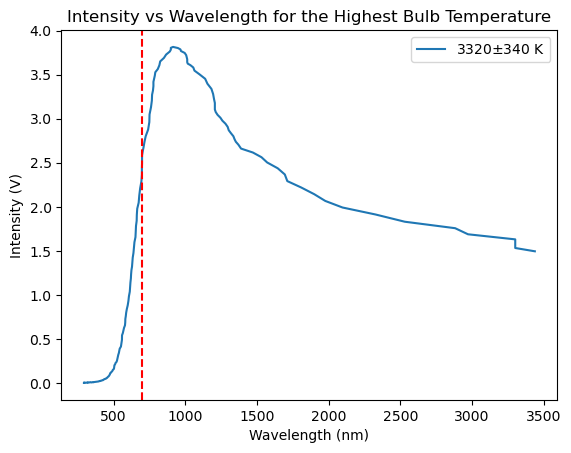

In [8]:
# load data from angle_data folder
# each file name is value.txt, where value is 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0
# contains angle, intensity

# load data from angle_data folder
index = 0
for name in np.arange(10.0, 10.5, 0.5):
    data = np.loadtxt('angle_data_old/{}.txt'.format(name), skiprows=2)
    angle = data[:, 0]
    
    intensity = data[:, 1]
    intensity = intensity - intensity.min()
    angle = angle * np.pi / 180
    angle = unp.uarray(angle, u_init_angle)
    angle = init_angle - angle
    n = unp.sqrt((2/3**0.5 * unp.sin(angle) + 0.5)**2 + 3/4)
    # filter all n <= 1.69
    intensity = intensity[n > 1.69]
    n = n[n > 1.69]
    print(n)
    A = unc.ufloat(13900, 100)
    B = unc.ufloat(1.689, 0.001)
    wavelength = unp.sqrt(A / (n - B))
    wavelength = unp.nominal_values(wavelength)
    # label each plot with the value 
    plt.plot(wavelength, intensity, label='{}$\pm${} K'.format(int(round(T[-1].n,-1)), int(round(T[-1].s,-1))))
    index += 1
    # plt.xlim(0.9, 1.1)

# plot vertical line at x=700
plt.axvline(x=700, color='r', linestyle='--')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (V)')
plt.title('Intensity vs Wavelength for the Highest Bulb Temperature')
plt.legend()
plt.show()
